<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 168.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 176.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 132.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 145.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 89.3 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
freq_emp = df['Employment'].mode()[0]
df['Epmloyment'] = df['Employment'].fillna(freq_emp)

freq_RW = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(freq_RW)

freq_JS = df['JobSat'].mode()[0]
df['JobSat'] = df['JobSat'].fillna(freq_JS)

print(f'La valeur la plus fréquente pour la colonne "Employment" est :',freq_emp,'\n','Cette colonne à maintenant', df['Employment'].isna().sum(),'valeurs manquantes.')
print(f'La valeur la plus fréquente pour la colonne "RemoteWork" est :',freq_RW,'\n','Cette colonne à maintenant', df['RemoteWork'].isna().sum(),'valeurs manquantes.')
print(f'La valeur la plus fréquente pour la colonne "JobSat" est :',freq_JS,'\n','Cette colonne à maintenant', df['JobSat'].isna().sum(),'valeurs manquantes.')


La valeur la plus fréquente pour la colonne "Employment" est : Employed, full-time 
 Cette colonne à maintenant 0 valeurs manquantes.
La valeur la plus fréquente pour la colonne "RemoteWork" est : Hybrid (some remote, some in-person) 
 Cette colonne à maintenant 0 valeurs manquantes.
La valeur la plus fréquente pour la colonne "JobSat" est : 8.0 
 Cette colonne à maintenant 0 valeurs manquantes.


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_820/2464398478.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_JS = df.groupby('ExperienceRange')['JobSat'].median()


ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
>20      8.0
Name: JobSat, dtype: float64


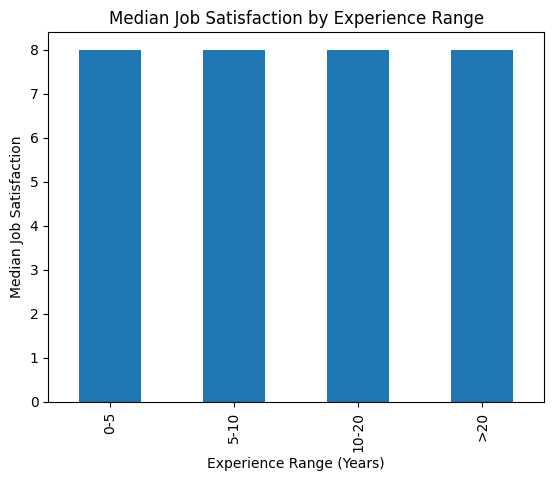

In [5]:
## Write your code here
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20'] 

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

med_JS = df.groupby('ExperienceRange')['JobSat'].median()
print(med_JS)

med_JS.plot(kind='bar')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.title('Median Job Satisfaction by Experience Range')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


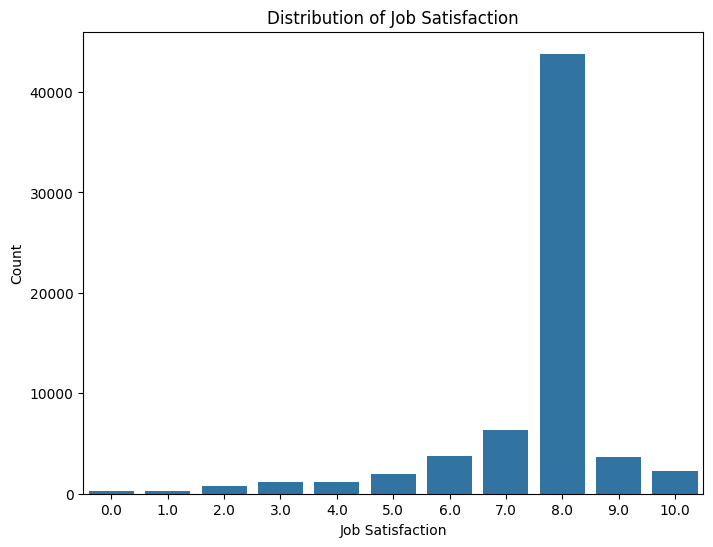

In [6]:
## Write your code here
df['JobSat'] = df['JobSat'].round(2)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSat')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


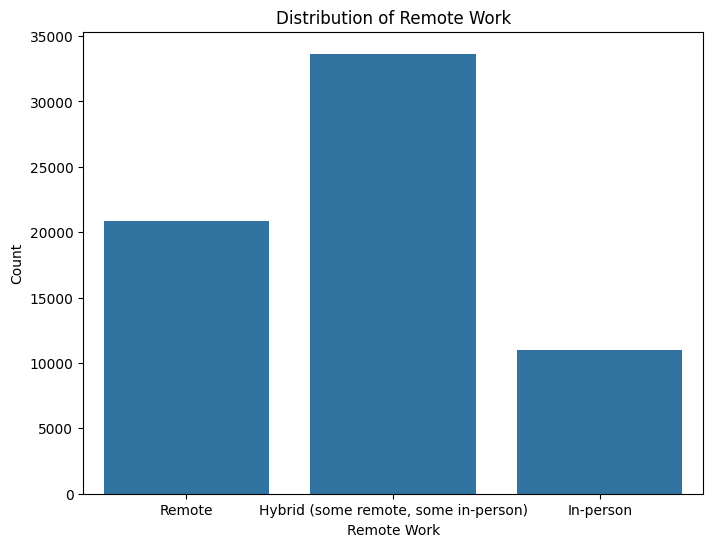

In [7]:
## Write your code here
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RemoteWork')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.title('Distribution of Remote Work')
plt.show()

cross_tab = pd.crosstab(df['RemoteWork'], df['Employment'])

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


                       Country             LanguageList  Count
5377  United States of America               JavaScript   6849
5391  United States of America                   Python   6238
5395  United States of America                      SQL   5766
5374  United States of America                 HTML/CSS   5754
5358  United States of America  Bash/Shell (all shells)   4776
5399  United States of America               TypeScript   4173
5360  United States of America                       C#   3112
5376  United States of America                     Java   2949
1822                   Germany               JavaScript   2732
2163                     India               JavaScript   2730


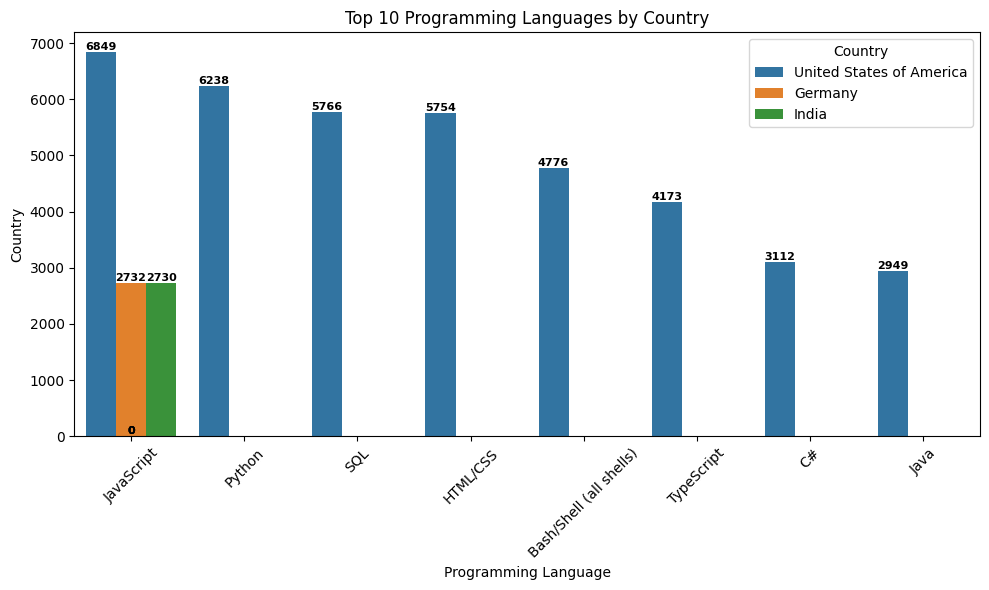

In [14]:
## Write your code here
# Étape 1 : Remplacer les valeurs manquantes dans la colonne LanguageHaveWorkedWith
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('')

# Étape 2 : Séparer les langages en lignes (explode)
df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageList')

# Étape 3 : Nettoyer les espaces autour des noms de langages
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()

# Étape 4 : Supprimer les lignes avec Country manquant
df_exploded = df_exploded[df_exploded['Country'].notna()]

# Étape 5 : Grouper par pays et langage
df_counts = df_exploded.groupby(['Country', 'LanguageList']).size().reset_index(name='Count')
df_counts = df_counts.sort_values(by='Count', ascending=False)
df_top_10_languages = df_counts.head(10)

# Résultat :
print(df_top_10_languages)

# Visualisation avec Heatmap :

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = df_top_10_languages, x = 'LanguageList', y = 'Count', hue = 'Country')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, fontweight = 'bold')
plt.xticks(rotation=45)
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.title('Top 10 Programming Languages by Country')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Corrélation entre l'expérience et la satisfaction au travail : 0.08


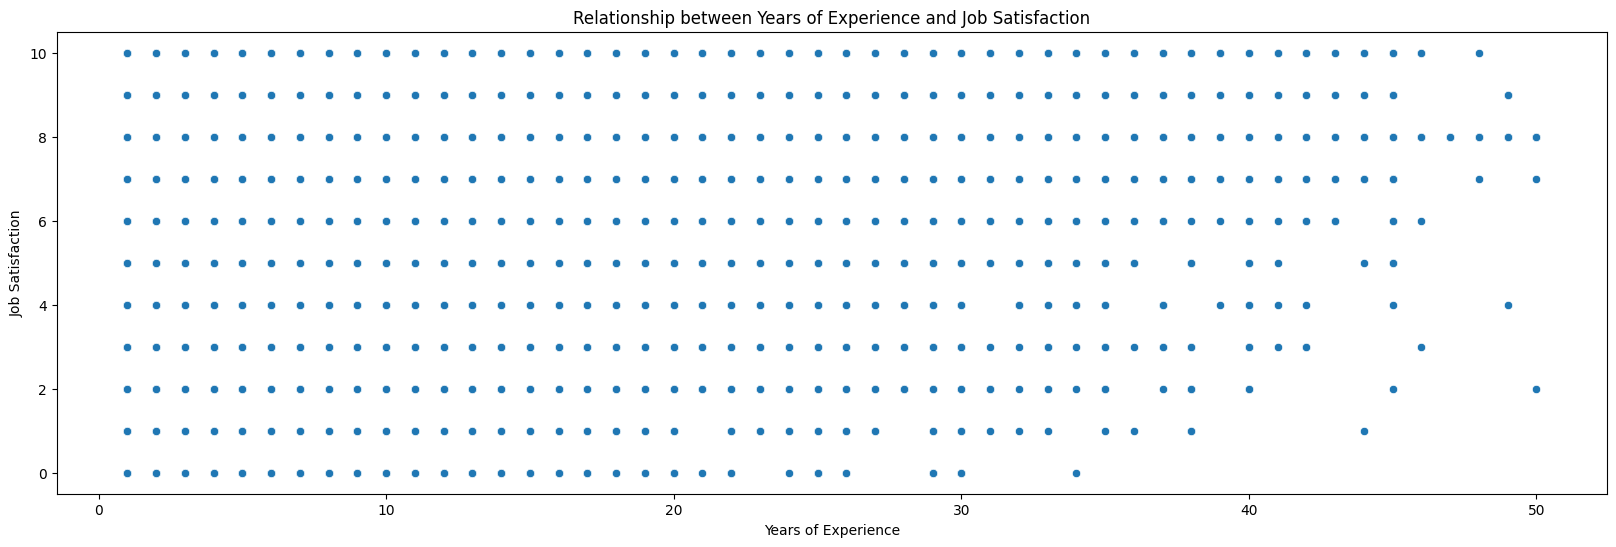

In [13]:
## Write your code here
# Afficher la corrélation entre YearsCodePro et JobSatPoins_1
correlation = df['YearsCodePro'].corr(df['JobSat'])
print(f"Corrélation entre l'expérience et la satisfaction au travail : {correlation:.2f}")

plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSat')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction')
plt.title('Relationship between Years of Experience and Job Satisfaction')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


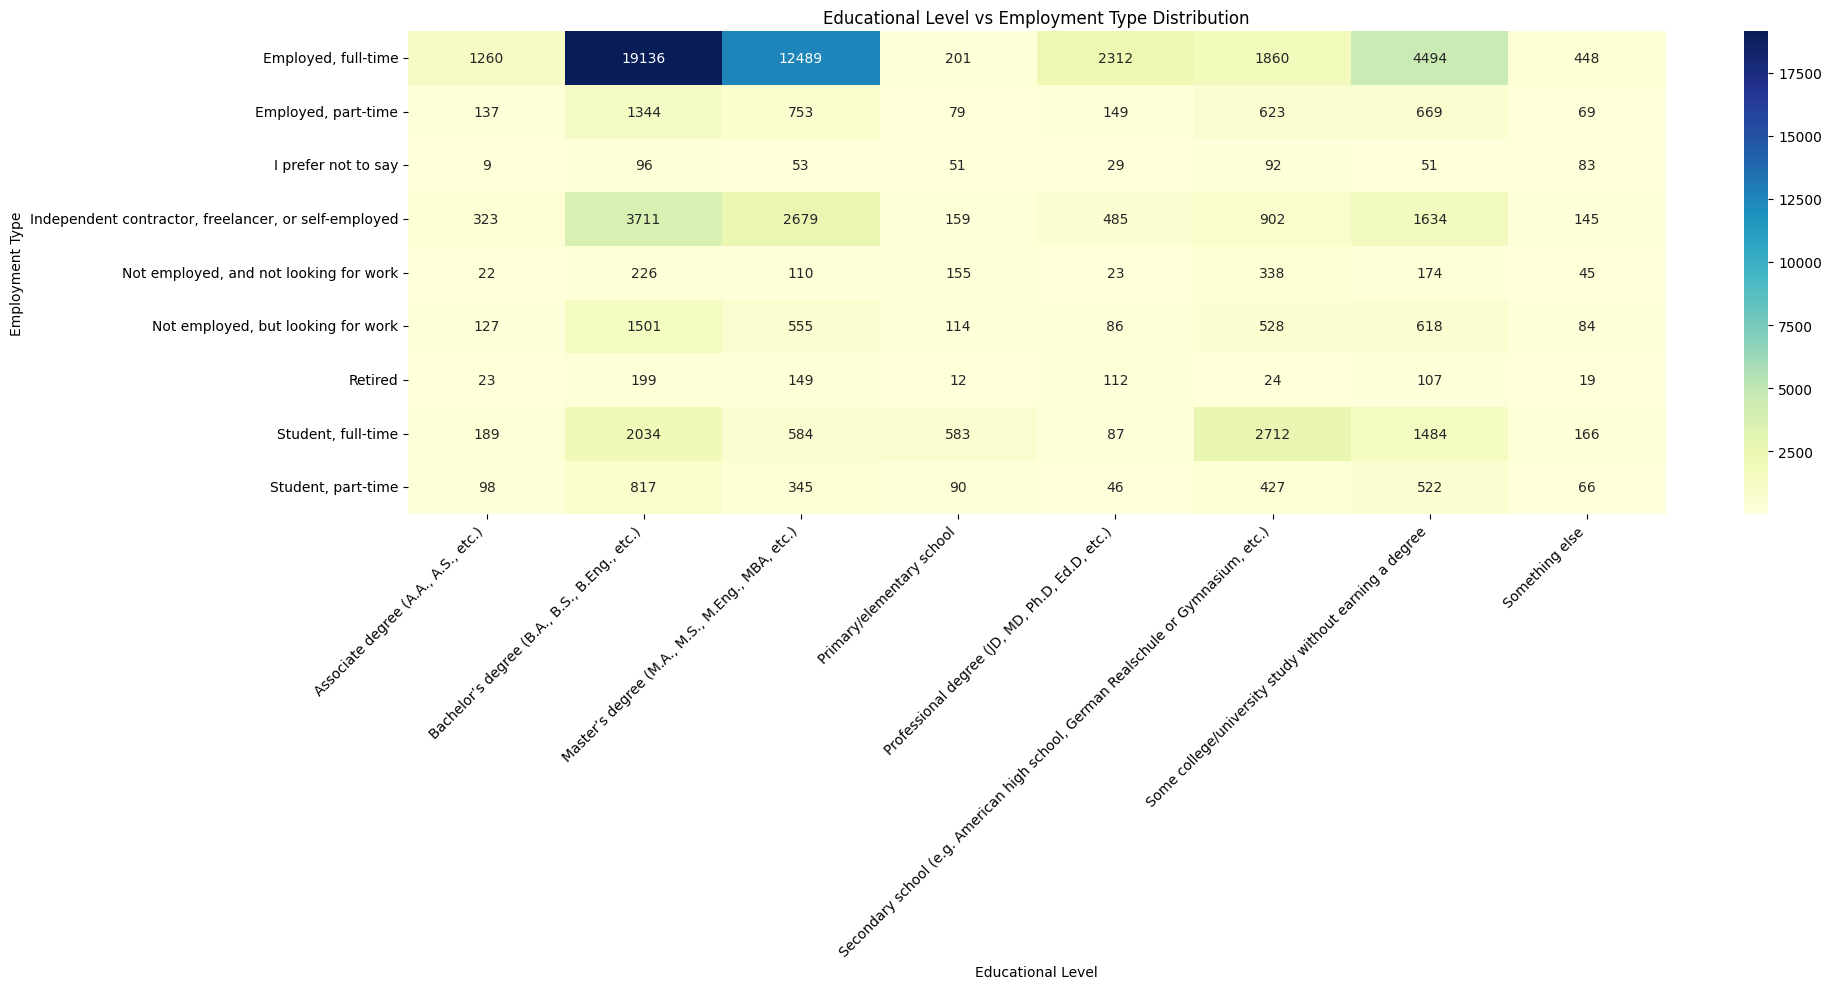

In [16]:
## Write your code here
df['Employment'] = df['Employment'].astype(str).fillna('')

df_exploded_emp = df.assign(EmpList=df['Employment'].str.split(';')).explode('EmpList')

df_exploded_emp['EmpList'] = df_exploded_emp['EmpList'].str.strip()

df_exploded_emp = df_exploded_emp[df_exploded_emp['EmpList'] != '']
df_exploded_emp = df_exploded_emp[df_exploded_emp['EmpList'].notna()]

crosstab_Ed_Emp = pd.crosstab(df_exploded_emp['EmpList'], df_exploded_emp['EdLevel'])

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(crosstab_Ed_Emp, annot=True, fmt='d', cmap='YlGnBu', ax=ax)

plt.xlabel('Educational Level')
plt.ylabel('Employment Type')
plt.title('Educational Level vs Employment Type Distribution')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
